In [1]:
import ROOT
import os, sys
import numpy as np
from glob import glob
from CMS_lumi import CMS_lumi

Welcome to JupyROOT 6.24/02


In [2]:
infile_list = glob("../miniTree/UL2017/miniTree_HDalitz_ggF_eeg_*.root")

# resovled
ROOT.EnableImplicitMT(20)
df = ROOT.RDataFrame("miniTree", infile_list)\
         .Filter("category == 1")\
         .Define("mgs", "diGenEle.M()")\
         .Define("dRee", "(float) ROOT::Math::VectorUtil::DeltaR(GenEle_Lead, GenEle_subLead)")
yields = df.Sum("wei")
print(yields.GetValue())

76.22218198623159


In [3]:
# ((HLTEleMuX >> 3) & 1) == 1
dRee_edge = [0, 0.03, 0.06, 0.09, 0.12, 0.16, 0.22,
                0.3, 0.4, 0.55, 0.7, 0.85, 1]
hSingleEleHLTPre  = df.Filter("eleCalibPt_Lead > 35 && eleCalibPt_subLead > 7")\
                      .Histo1D(("hSingleEleHLTPre", "", 20, 0, 1), "dRee", "wei")
                     
hSingleEleHLTPass = df.Filter("eleCalibPt_Lead > 35 && eleCalibPt_subLead > 7 && ((HLTEleMuX >> 54) & 1) == 1")\
                      .Histo1D(("hSingleEleHLTPass", "", 20, 0, 1), "dRee", "wei")
 
yields = df.Filter("eleCalibPt_Lead > 35 && eleCalibPt_subLead > 7 && ((HLTEleMuX >> 3) & 1) == 1").Sum("wei")
err = ROOT.TGraphAsymmErrors(hSingleEleHLTPass.GetPtr(), hSingleEleHLTPre.GetPtr())
print(yields.GetValue())

16.887681254731433


Warning in <TGraphAsymmErrors::Divide>: Histograms have weights: only Normal or Bayesian error calculation is supported
Info in <TGraphAsymmErrors::Divide>: Using now the Normal approximation for weighted histograms


In [4]:
# ((HLTEleMuX >> 3) & 1) == 1
hDoubleEleHLTPre  = df.Filter("eleCalibPt_Lead > 25 && eleCalibPt_subLead > 25")\
                      .Histo1D(("hDoubleEleHLTPre", "", 20, 0, 1), "dRee", "wei")
                     
hDoubleEleHLTPass = df.Filter("eleCalibPt_Lead > 25 && eleCalibPt_subLead > 25 && (((HLTEleMuX >> 40 & 1) == 1) || ((HLTEleMuX >> 5 & 1) == 1))")\
                      .Histo1D(("hDoubleEleHLTPass", "", 20, 0, 1), "dRee", "wei")

yields = df.Filter("eleCalibPt_Lead > 25 && eleCalibPt_subLead > 25 && ((HLTEleMuX >> 40 & 1) == 1)").Sum("wei")
err_diele = ROOT.TGraphAsymmErrors(hDoubleEleHLTPass.GetPtr(), hDoubleEleHLTPre.GetPtr())
print(yields.GetValue())

4.560269261965004


Warning in <TGraphAsymmErrors::Divide>: Histograms have weights: only Normal or Bayesian error calculation is supported
Info in <TGraphAsymmErrors::Divide>: Using now the Normal approximation for weighted histograms


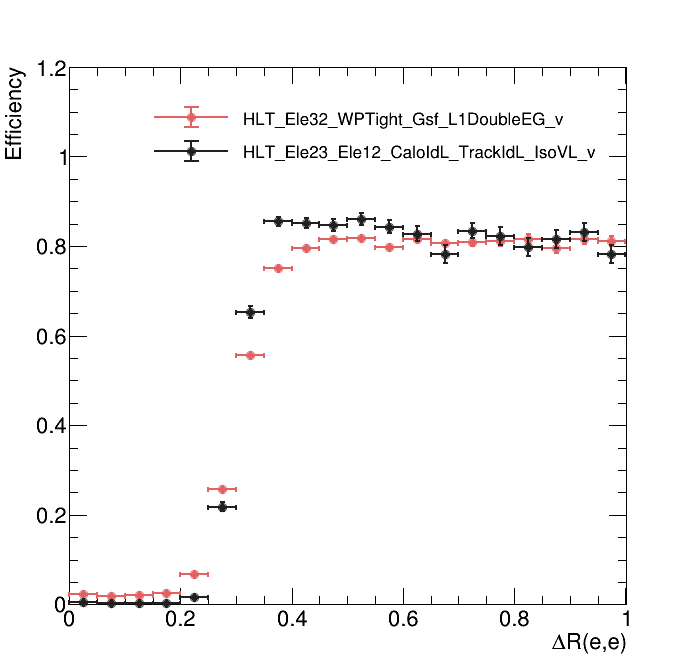

In [5]:
ROOT.gStyle.SetPadTickX(1)
ROOT.gStyle.SetPadTickY(1)
ROOT.gStyle.SetOptStat(0)
    
c = ROOT.TCanvas("c", "", 700, 700)
c.cd()

err.GetXaxis().SetTitle("#DeltaR(e,e)")
err.GetYaxis().SetTitle("Efficiency")
err.GetYaxis().SetRangeUser(0, 1.2)
err.GetXaxis().SetRangeUser(0, 1)

err.SetMarkerStyle(20)
err.SetMarkerSize(1.2)
err.SetMarkerColor(ROOT.TColor.GetColor("#E16262"))
err.SetLineColor(ROOT.TColor.GetColor("#E16262"))
err.SetLineWidth(2)
err.Draw("AP")

err_diele.SetMarkerStyle(20)
err_diele.SetMarkerSize(1.2)
err_diele.SetMarkerColor(ROOT.TColor.GetColor("#202020"))
err_diele.SetLineColor(ROOT.TColor.GetColor("#202020"))
err_diele.SetLineWidth(2)
err_diele.Draw("P same")

leg = ROOT.TLegend(0.2, 0.75, 0.8, 0.85)
leg.SetTextSize(0.028)
leg.AddEntry(err, "HLT_Ele32_WPTight_Gsf_L1DoubleEG_v", "LE1P")
leg.AddEntry(err_diele, "HLT_Ele23_Ele12_CaloIdL_TrackIdL_IsoVL_v", "LE1P")
leg.SetFillColor(0)
leg.SetLineColor(0)
leg.Draw()

c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


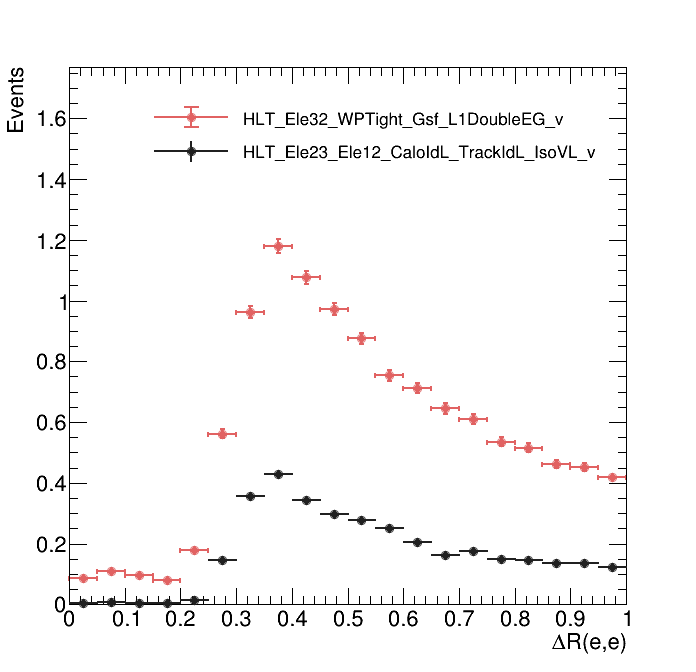

In [6]:
ROOT.gStyle.SetPadTickX(1)
ROOT.gStyle.SetPadTickY(1)
ROOT.gStyle.SetOptStat(0)
    
c = ROOT.TCanvas("c", "", 700, 700)
c.cd()

hSingleEleHLTPass.GetXaxis().SetTitle("#DeltaR(e,e)")
hSingleEleHLTPass.GetYaxis().SetTitle("Events")
hSingleEleHLTPass.GetYaxis().SetRangeUser(0, 1.5*hSingleEleHLTPass.GetMaximum())
hSingleEleHLTPass.GetXaxis().SetRangeUser(0, 1)

hSingleEleHLTPass.SetMarkerStyle(20)
hSingleEleHLTPass.SetMarkerSize(1.2)
hSingleEleHLTPass.SetMarkerColor(ROOT.TColor.GetColor("#E16262"))
hSingleEleHLTPass.SetLineColor(ROOT.TColor.GetColor("#E16262"))
hSingleEleHLTPass.SetLineWidth(2)
hSingleEleHLTPass.Draw("LE1P")

hDoubleEleHLTPass.SetMarkerStyle(20)
hDoubleEleHLTPass.SetMarkerSize(1.2)
hDoubleEleHLTPass.SetMarkerColor(ROOT.TColor.GetColor("#202020"))
hDoubleEleHLTPass.SetLineColor(ROOT.TColor.GetColor("#202020"))
hDoubleEleHLTPass.SetLineWidth(2)
hDoubleEleHLTPass.Draw("P same")

leg = ROOT.TLegend(0.2, 0.75, 0.8, 0.85)
leg.SetTextSize(0.028)
leg.AddEntry(hSingleEleHLTPass.GetPtr(), "HLT_Ele32_WPTight_Gsf_L1DoubleEG_v", "LE1P")
leg.AddEntry(hDoubleEleHLTPass.GetPtr(), "HLT_Ele23_Ele12_CaloIdL_TrackIdL_IsoVL_v", "LE1P")
leg.SetFillColor(0)
leg.SetLineColor(0)
leg.Draw()

c.Draw()

In [7]:
# ((HLTEleMuX >> 3) & 1) == 1
mgs_edge = [0., 1., 2., 3., 4., 5., 6., 7., 8.,
                9., 10., 15., 20., 30., 40., 50., 60.]
hSingleEleHLTPre  = df.Filter("eleCalibPt_Lead > 35 && eleCalibPt_subLead > 7")\
                      .Histo1D(("hSingleEleHLTPre", "", 30, 0, 60), "mgs", "wei")
                     
hSingleEleHLTPass = df.Filter("eleCalibPt_Lead > 35 && eleCalibPt_subLead > 7 && ((HLTEleMuX >> 3) & 1) == 1")\
                      .Histo1D(("hSingleEleHLTPass", "", 30, 0, 60), "mgs", "wei")
                                            
err = ROOT.TGraphAsymmErrors(hSingleEleHLTPass.GetPtr(), hSingleEleHLTPre.GetPtr())

Warning in <TGraphAsymmErrors::Divide>: Histograms have weights: only Normal or Bayesian error calculation is supported
Info in <TGraphAsymmErrors::Divide>: Using now the Normal approximation for weighted histograms


In [8]:
# ((HLTEleMuX >> 3) & 1) == 1
hDoubleEleHLTPre  = df.Filter("eleCalibPt_Lead > 25 && eleCalibPt_subLead > 25")\
                      .Histo1D(("hDoubleEleHLTPre", "", 30, 0, 60), "mgs", "wei")
                     
hDoubleEleHLTPass = df.Filter("eleCalibPt_Lead > 25 && eleCalibPt_subLead > 25 && ((HLTEleMuX >> 40 & 1) == 1)")\
                      .Histo1D(("hDoubleEleHLTPass", "", 30, 0, 60), "mgs", "wei")
                      
err_diele = ROOT.TGraphAsymmErrors(hDoubleEleHLTPass.GetPtr(), hDoubleEleHLTPre.GetPtr())

Warning in <TGraphAsymmErrors::Divide>: Histograms have weights: only Normal or Bayesian error calculation is supported
Info in <TGraphAsymmErrors::Divide>: Using now the Normal approximation for weighted histograms


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


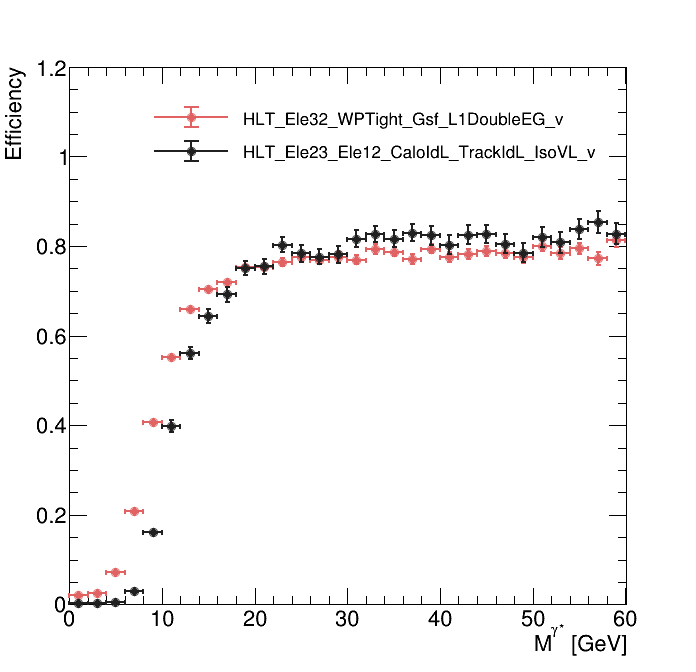

In [9]:
ROOT.gStyle.SetPadTickX(1)
ROOT.gStyle.SetPadTickY(1)
ROOT.gStyle.SetOptStat(0)
    
c = ROOT.TCanvas("c", "", 700, 700)
c.cd()

err.GetXaxis().SetTitle("M^{#gamma*} [GeV]")
err.GetYaxis().SetTitle("Efficiency")
err.GetYaxis().SetRangeUser(0, 1.2)
err.GetXaxis().SetRangeUser(0, 60)

err.SetMarkerStyle(20)
err.SetMarkerSize(1.2)
err.SetMarkerColor(ROOT.TColor.GetColor("#E16262"))
err.SetLineColor(ROOT.TColor.GetColor("#E16262"))
err.SetLineWidth(2)
err.Draw("AP")

err_diele.SetMarkerStyle(20)
err_diele.SetMarkerSize(1.2)
err_diele.SetMarkerColor(ROOT.TColor.GetColor("#202020"))
err_diele.SetLineColor(ROOT.TColor.GetColor("#202020"))
err_diele.SetLineWidth(2)
err_diele.Draw("P same")

leg = ROOT.TLegend(0.2, 0.75, 0.8, 0.85)
leg.SetTextSize(0.028)
leg.AddEntry(err, "HLT_Ele32_WPTight_Gsf_L1DoubleEG_v", "LE1P")
leg.AddEntry(err_diele, "HLT_Ele23_Ele12_CaloIdL_TrackIdL_IsoVL_v", "LE1P")
leg.SetFillColor(0)
leg.SetLineColor(0)
leg.Draw()

c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


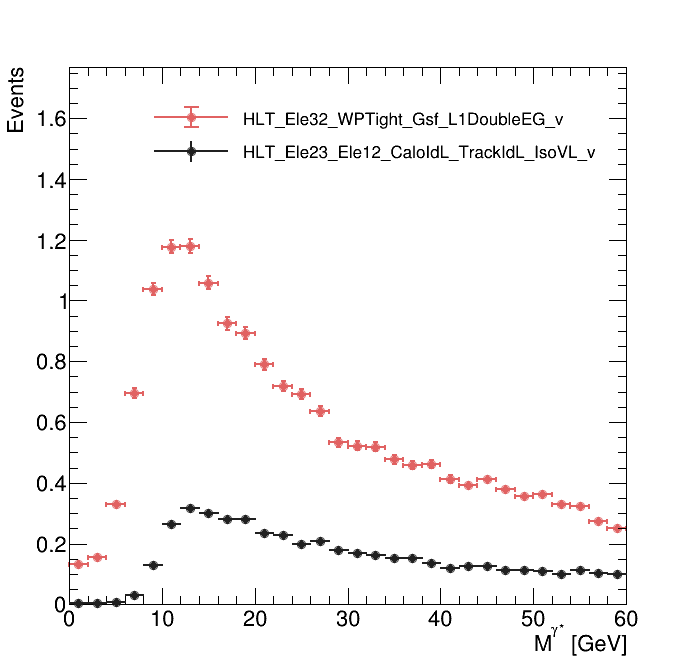

In [10]:
ROOT.gStyle.SetPadTickX(1)
ROOT.gStyle.SetPadTickY(1)
ROOT.gStyle.SetOptStat(0)
    
c = ROOT.TCanvas("c", "", 700, 700)
c.cd()

hSingleEleHLTPass.GetXaxis().SetTitle("M^{#gamma*} [GeV]")
hSingleEleHLTPass.GetYaxis().SetTitle("Events")
hSingleEleHLTPass.GetYaxis().SetRangeUser(0, 1.5*hSingleEleHLTPass.GetMaximum())
hSingleEleHLTPass.GetXaxis().SetRangeUser(0, 60)

hSingleEleHLTPass.SetMarkerStyle(20)
hSingleEleHLTPass.SetMarkerSize(1.2)
hSingleEleHLTPass.SetMarkerColor(ROOT.TColor.GetColor("#E16262"))
hSingleEleHLTPass.SetLineColor(ROOT.TColor.GetColor("#E16262"))
hSingleEleHLTPass.SetLineWidth(2)
hSingleEleHLTPass.Draw("LE1sP")

hDoubleEleHLTPass.SetMarkerStyle(20)
hDoubleEleHLTPass.SetMarkerSize(1.2)
hDoubleEleHLTPass.SetMarkerColor(ROOT.TColor.GetColor("#202020"))
hDoubleEleHLTPass.SetLineColor(ROOT.TColor.GetColor("#202020"))
hDoubleEleHLTPass.SetLineWidth(2)
hDoubleEleHLTPass.Draw("P same")

leg = ROOT.TLegend(0.2, 0.75, 0.8, 0.85)
leg.SetTextSize(0.028)
leg.AddEntry(hSingleEleHLTPass.GetPtr(), "HLT_Ele32_WPTight_Gsf_L1DoubleEG_v", "LE1P")
leg.AddEntry(hDoubleEleHLTPass.GetPtr(), "HLT_Ele23_Ele12_CaloIdL_TrackIdL_IsoVL_v", "LE1P")
leg.SetFillColor(0)
leg.SetLineColor(0)
leg.Draw()

c.Draw()